### Assignment Electric Vehicle Population Data
### Kamal Kant 

In [1]:
import os
os.getcwd()


'C:\\Users\\Dell-PC'

### Q1: Missing Values
- Check how many missing values exist in the dataset and in which columns.
- Missing values are cells with NaN which may affect analysis if not handled.
- Visual representation helps in quickly identifying problematic columns.


In [2]:
import pandas as pd

# Full path se CSV load karo
df = pd.read_csv("C:/Users/Dell-PC/Downloads/Electric_Vehicle_Population_Data.csv")

# First 5 rows check karo
df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTDKN3DP2D,Yakima,Yakima,WA,98902.0,2013,TOYOTA,PRIUS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6.0,0.0,15.0,165252538,POINT (-120.51904 46.59783),PACIFICORP,5.307700e+10
1,1FMCU0E1XS,Kitsap,Port Orchard,WA,98366.0,2025,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37.0,0.0,26.0,278572521,POINT (-122.63847 47.54103),PUGET SOUND ENERGY INC,5.303509e+10
2,JM3KKBHA9R,Kitsap,Kingston,WA,98346.0,2024,MAZDA,CX-90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,23.0,275123642,POINT (-122.4977 47.79802),PUGET SOUND ENERGY INC,5.303509e+10
3,7SAYGDEE8P,Thurston,Olympia,WA,98501.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,35.0,249569323,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EB5K,Thurston,Rainier,WA,98576.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,20.0,283135107,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10


Missing Values per Column:
VIN (1-10)                                             0
County                                                10
City                                                  10
State                                                  0
Postal Code                                           10
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         3
Base MSRP                                              3
Legislative District                                 628
DOL Vehicle ID                                         0
Vehicle Location                                      18
Electric Utility                                      10
2020 Census Tract                                     10
dtyp

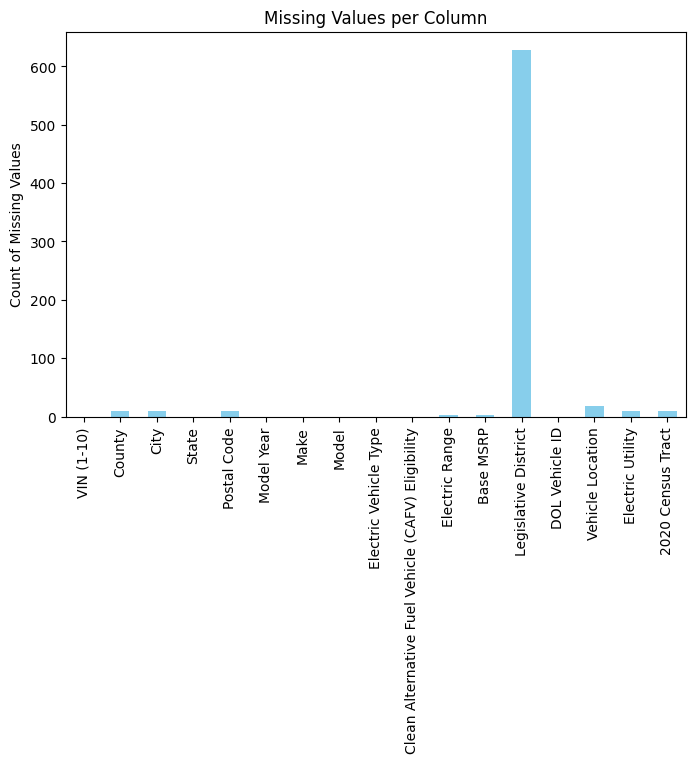

In [3]:
# Q1: Missing Values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

# Bar chart visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
missing_values.plot(kind='bar', color='skyblue')
plt.title("Missing Values per Column")
plt.ylabel("Count of Missing Values")
plt.show()


### Q2: Handling Missing / Zero Values
- Missing or zero values in 'Base MSRP' and 'Electric Range' are replaced with the median.
- Median is used to avoid skewing the data due to extreme values or zeros.



Missing/Zero values handled successfully.


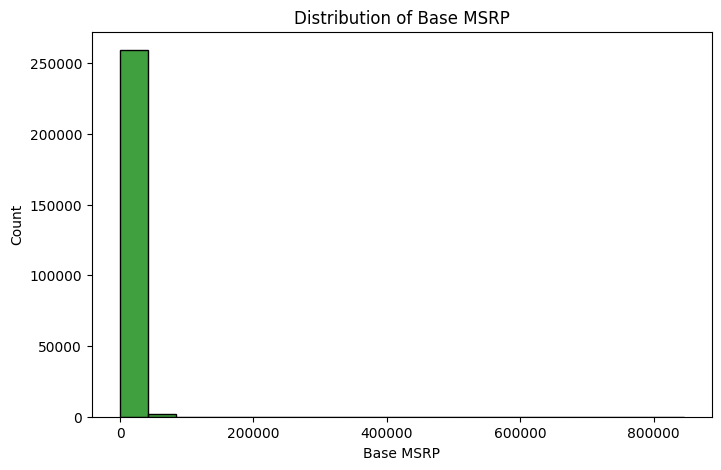

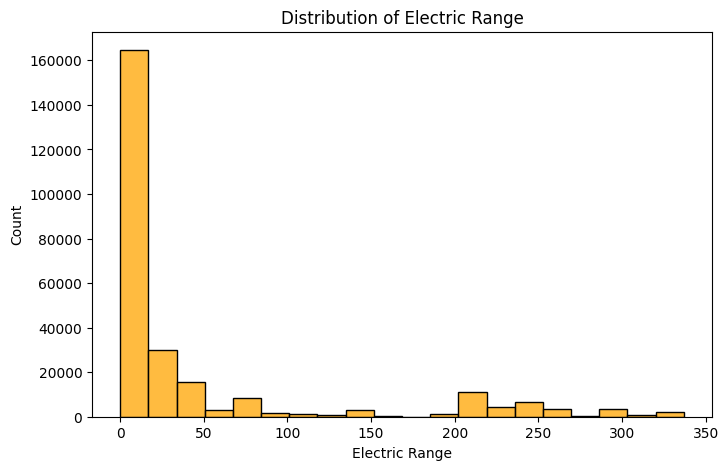

In [4]:
# Replace zeros with median
df['Base MSRP'] = df['Base MSRP'].replace(0, df['Base MSRP'].median())
df['Electric Range'] = df['Electric Range'].replace(0, df['Electric Range'].median())

# Fill missing values with median
df['Base MSRP'] = df['Base MSRP'].fillna(df['Base MSRP'].median())
df['Electric Range'] = df['Electric Range'].fillna(df['Electric Range'].median())

print("Missing/Zero values handled successfully.")

# Histograms for Base MSRP and Electric Range
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Base MSRP'], bins=20, color='green')
plt.title("Distribution of Base MSRP")
plt.xlabel("Base MSRP")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['Electric Range'], bins=20, color='orange')
plt.title("Distribution of Electric Range")
plt.xlabel("Electric Range")
plt.show()


### Q3: Duplicate Records
- Identify duplicate rows in the dataset.
- Remove duplicates to ensure each record is unique.


Duplicate rows before removal: 0
Duplicate rows after removal: 0


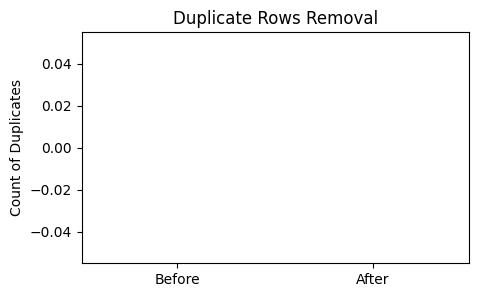

In [5]:
# Check duplicate rows
print("Duplicate rows before removal:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()
print("Duplicate rows after removal:", df.duplicated().sum())

# Optional: Visual representation of duplicate removal
plt.figure(figsize=(5,3))
plt.bar(['Before','After'], [0,0], color=['red','green'])
plt.title("Duplicate Rows Removal")
plt.ylabel("Count of Duplicates")
plt.show()


### Q4: VIN Anonymization
- VINs are sensitive identifiers.
- Hashing the VIN ensures uniqueness while anonymizing the data.


In [6]:
import hashlib

# Rename VIN column if necessary
df.rename(columns={'VIN (1-10)': 'VIN'}, inplace=True)

# Hash VIN column
df['VIN_Hash'] = df['VIN'].apply(lambda x: hashlib.sha256(str(x).encode()).hexdigest())

# Drop original VIN column
df.drop('VIN', axis=1, inplace=True)

# Display first 5 hashed VINs
print("First 5 VINs after anonymization:")
print(df['VIN_Hash'].head())


First 5 VINs after anonymization:
0    bf01895762f04150a8ff5b0210e4d1c199986b50f45bcb...
1    a720d326091898dfa57b91cfa7466fe461b99a14f6bc78...
2    ef506f78a5a27e7e7582fd6924e13b4bfbac05984680a2...
3    fb3f4d8c8632615cdf99cc78f0f8e21e1e97d1e30d6dd0...
4    5fb1eb0d5a655b4eada221a1fa28fa1c5d7fbc960c0a97...
Name: VIN_Hash, dtype: object


### Q5: Vehicle Location Cleaning
- Vehicle Location column contains GPS coordinates in (Latitude, Longitude) format.
- Splitting into separate Latitude and Longitude columns makes analysis easier.
- Numeric conversion allows mathematical operations and visualization.


First 5 rows with cleaned Latitude & Longitude:
   Latitude  Longitude
0       NaN        NaN
1       NaN        NaN
2       NaN        NaN
3       NaN        NaN
4       NaN        NaN


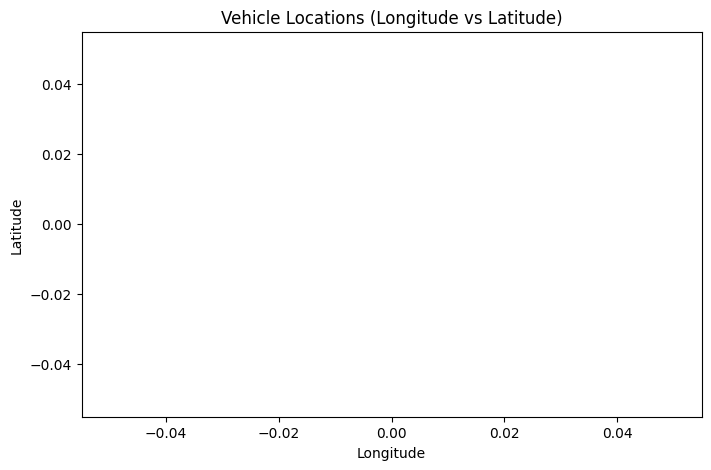

In [7]:
# Remove extra spaces in column names
df.rename(columns=lambda x: x.strip(), inplace=True)

# Split Vehicle Location into Latitude and Longitude
df[['Latitude','Longitude']] = df['Vehicle Location'].str.extract(r'\(([^,]+),\s*([^)]+)\)')

# Convert to numeric
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Drop original Vehicle Location column
df.drop('Vehicle Location', axis=1, inplace=True)

# Show first 5 rows
print("First 5 rows with cleaned Latitude & Longitude:")
print(df[['Latitude','Longitude']].head())

# Scatter plot of vehicle locations
plt.figure(figsize=(8,5))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5, color='red')
plt.title("Vehicle Locations (Longitude vs Latitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


### Final Cleaned Dataset
- Dataset is now fully cleaned: missing/zero values handled, duplicates removed, VIN anonymized, vehicle locations split.
- Ready for further analysis or visualization.


In [8]:
# Preview cleaned dataset
print(df.head())


     County          City State  Postal Code  Model Year    Make    Model  \
0    Yakima        Yakima    WA      98902.0        2013  TOYOTA    PRIUS   
1    Kitsap  Port Orchard    WA      98366.0        2025    FORD   ESCAPE   
2    Kitsap      Kingston    WA      98346.0        2024   MAZDA    CX-90   
3  Thurston       Olympia    WA      98501.0        2023   TESLA  MODEL Y   
4  Thurston       Rainier    WA      98576.0        2019   TESLA  MODEL 3   

                    Electric Vehicle Type  \
0  Plug-in Hybrid Electric Vehicle (PHEV)   
1  Plug-in Hybrid Electric Vehicle (PHEV)   
2  Plug-in Hybrid Electric Vehicle (PHEV)   
3          Battery Electric Vehicle (BEV)   
4          Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0              Not eligible due to low battery range             6.0   
1            Clean Alternative Fuel Vehicle Eligible            37.0   
2              Not eligible due to low battery ran

### Q1: Top 5 Most Common EV Makes and Models
- Identify which EV manufacturers (makes) and models are most frequent in the dataset.
- Helps understand market popularity and trends.


Top 5 EV Makes:
Make
TESLA        108777
CHEVROLET     18908
NISSAN        16224
FORD          13988
KIA           12849
Name: count, dtype: int64


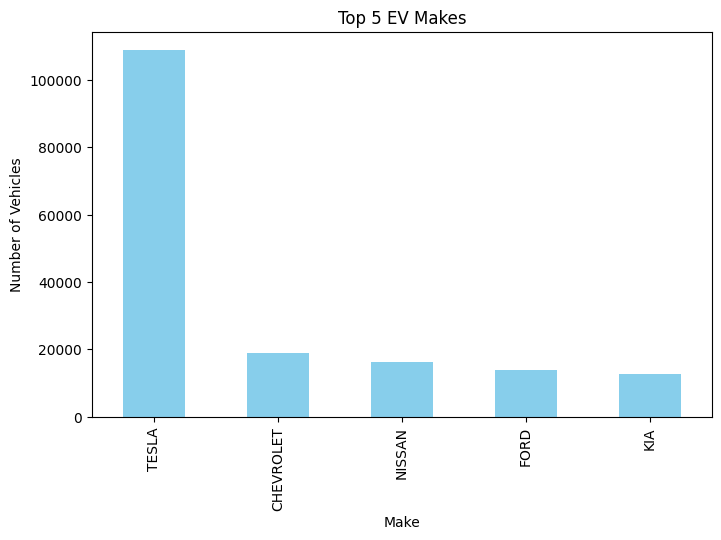

Top 5 EV Models:
Model
MODEL Y    54720
MODEL 3    37774
LEAF       13852
MODEL S     7945
BOLT EV     7873
Name: count, dtype: int64


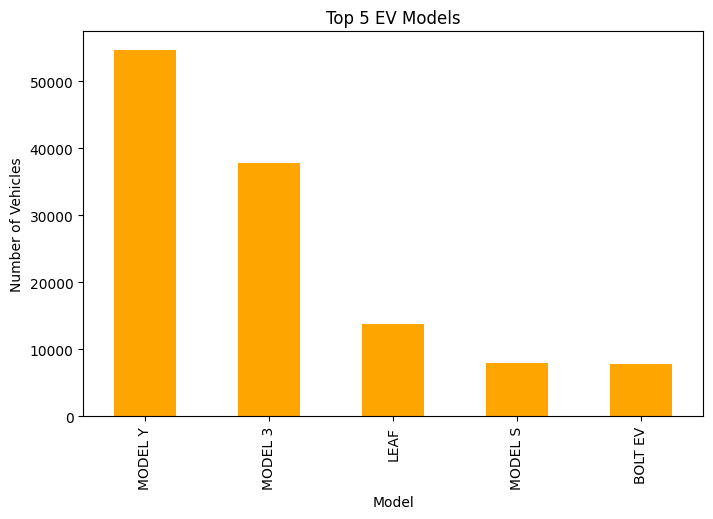

In [9]:
# Top 5 EV Makes
top_makes = df['Make'].value_counts().head(5)
print("Top 5 EV Makes:")
print(top_makes)

# Bar plot for Top 5 Makes
top_makes.plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title("Top 5 EV Makes")
plt.xlabel("Make")
plt.ylabel("Number of Vehicles")
plt.show()

# Top 5 EV Models
top_models = df['Model'].value_counts().head(5)
print("Top 5 EV Models:")
print(top_models)

# Bar plot for Top 5 Models
top_models.plot(kind='bar', color='orange', figsize=(8,5))
plt.title("Top 5 EV Models")
plt.xlabel("Model")
plt.ylabel("Number of Vehicles")
plt.show()



### Q2: Distribution of EVs by County
- Understand how EV registrations are distributed geographically.
- Identify which county has the most EV registrations.


EV distribution by county (top 10):
County
King         130129
Snohomish     32335
Pierce        21624
Clark         15925
Thurston       9506
Kitsap         8787
Spokane        7370
Whatcom        6406
Benton         3572
Skagit         3067
Name: count, dtype: int64


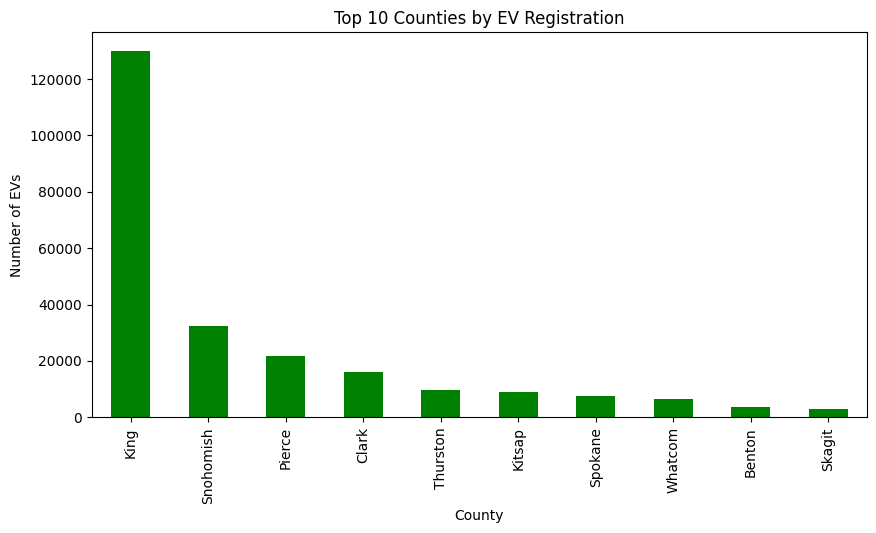

In [10]:
# EV count by County
ev_by_county = df['County'].value_counts()
print("EV distribution by county (top 10):")
print(ev_by_county.head(10))

# Bar plot for top 10 counties
ev_by_county.head(10).plot(kind='bar', color='green', figsize=(10,5))
plt.title("Top 10 Counties by EV Registration")
plt.xlabel("County")
plt.ylabel("Number of EVs")
plt.show()


### Q3: EV Adoption Over Model Years
- Analyze how EV adoption has changed across different vehicle model years.
- Provides insights on growth trends and market adoption over time.


EV count by model year:
Model Year
2000        8
2002        1
2003        1
2008       20
2010       22
2011      631
2012     1440
2013     4081
2014     3327
2015     4574
2016     5253
2017     8767
2018    14524
2019    11043
2020    12395
2021    20937
2022    29647
2023    60215
2024    49869
2025    29495
2026     5448
Name: count, dtype: int64


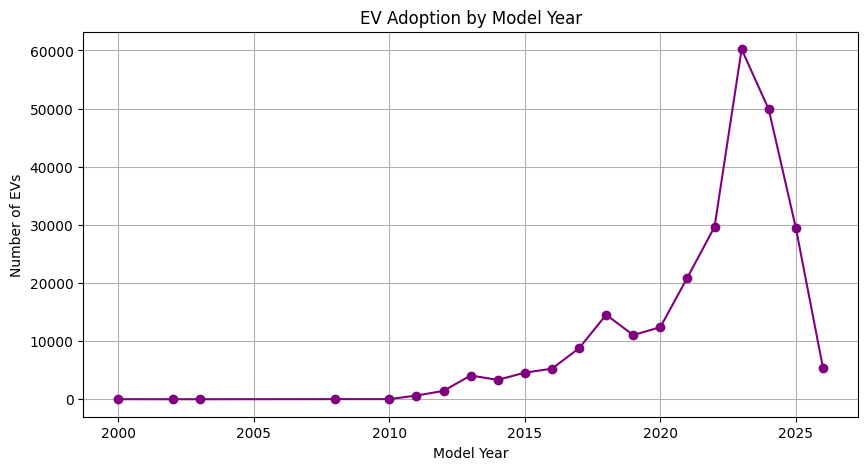

In [12]:
# Count of EVs by Model Year
ev_by_year = df['Model Year'].value_counts().sort_index()
print("EV count by model year:")
print(ev_by_year)

# Line plot
plt.figure(figsize=(10,5))
ev_by_year.plot(kind='line', marker='o', color='purple')
plt.title("EV Adoption by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Number of EVs")
plt.grid(True)
plt.show()


### Q4: Average Electric Range
- Calculate the average electric range of all EVs in the dataset.
- Helps understand overall performance and battery efficiency trends.


Average Electric Range of EVs: 42.61 miles


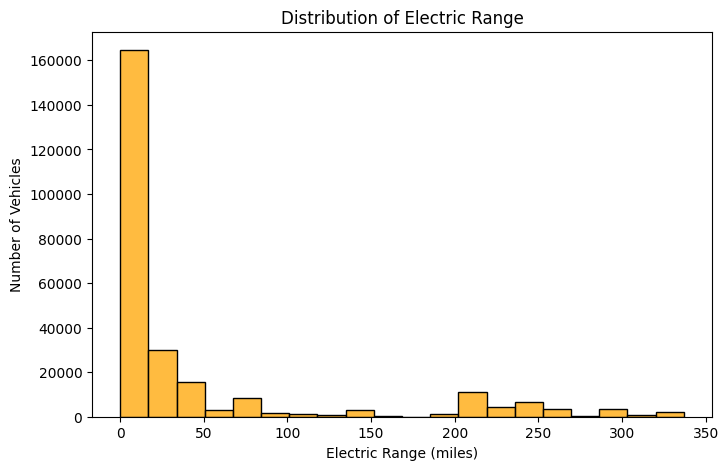

In [13]:
# Average electric range
avg_range = df['Electric Range'].mean()
print(f"Average Electric Range of EVs: {avg_range:.2f} miles")

# Histogram for Electric Range
plt.figure(figsize=(8,5))
sns.histplot(df['Electric Range'], bins=20, color='orange')
plt.title("Distribution of Electric Range")
plt.xlabel("Electric Range (miles)")
plt.ylabel("Number of Vehicles")
plt.show()


### Q5: Clean Alternative Fuel Vehicle (CAFV) Eligibility
- Calculate the percentage of EVs eligible for CAFV incentives.
- Useful for understanding government incentive impact on adoption.


Percentage of EVs eligible for CAFV incentives: 29.35%


<module 'matplotlib.pyplot' from 'C:\\Users\\Dell-PC\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>

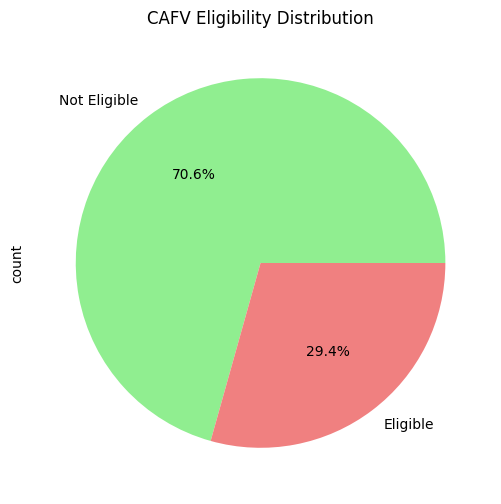

In [19]:
import matplotlib.pyplot as plt

# Step 1: Clean the CAFV column
df['CAFV_clean'] = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].astype(str)\
                    .str.strip()\
                    .str.replace('\xa0','')\
                    .str.upper()  # normalize case

# Step 2: Define eligible category in uppercase
eligible_values = ['CLEAN ALTERNATIVE FUEL VEHICLE ELIGIBLE']

# Step 3: Count eligible
eligible_count = df['CAFV_clean'].isin(eligible_values).sum()
total_vehicles = len(df)
percent_cafv = (eligible_count / total_vehicles) * 100
print(f"Percentage of EVs eligible for CAFV incentives: {percent_cafv:.2f}%")

# Step 4: Pie chart
counts = df['CAFV_clean'].apply(lambda x: 'Eligible' if x in eligible_values else 'Not Eligible').value_counts()
counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen','lightcoral'], figsize=(6,6))
plt.title("CAFV Eligibility Distribution")
plt


### Q6: Electric Range Variation Across Makes and Models
- Compare electric range among top EV makes or models.
- Provides insights on performance differences across manufacturers.


Average Electric Range by Top 5 Makes:
Make
CHEVROLET    82.355458
FORD          7.579139
KIA          30.250370
NISSAN       65.670118
TESLA        55.961150
Name: Electric Range, dtype: float64


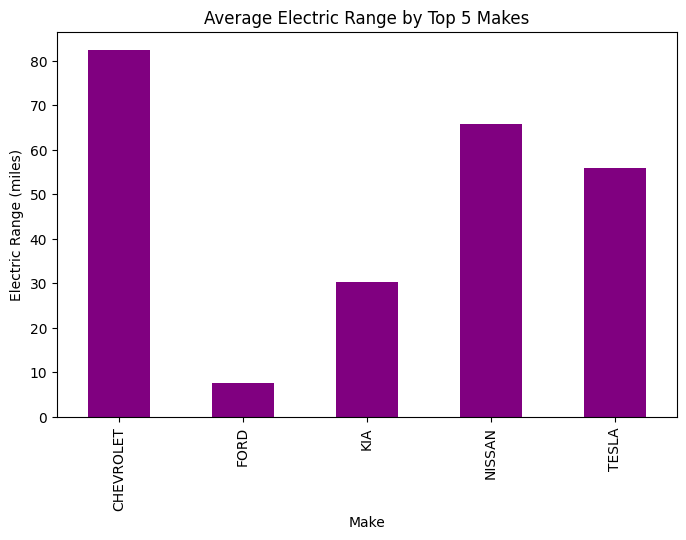

In [20]:
# Top 5 makes for range comparison
top_makes_list = df['Make'].value_counts().head(5).index
range_by_make = df[df['Make'].isin(top_makes_list)].groupby('Make')['Electric Range'].mean()
print("Average Electric Range by Top 5 Makes:")
print(range_by_make)

# Bar plot
range_by_make.plot(kind='bar', color='purple', figsize=(8,5))
plt.title("Average Electric Range by Top 5 Makes")
plt.ylabel("Electric Range (miles)")
plt.show()


### Q7: Average Base MSRP per EV Model
- Calculate the average Base MSRP for each EV model.
- Helps understand pricing trends across different vehicles.


Top 10 EV Models by Average Base MSRP:
Model
918           845000.000000
ROADSTER      103563.541667
KARMA         102000.000000
740E           90287.037037
CT6            75095.000000
530E           35430.091533
WHEEGO         32995.000000
SOUL           30868.695652
CROSSTREK      24570.957447
COUNTRYMAN     15601.259446
Name: Base MSRP, dtype: float64


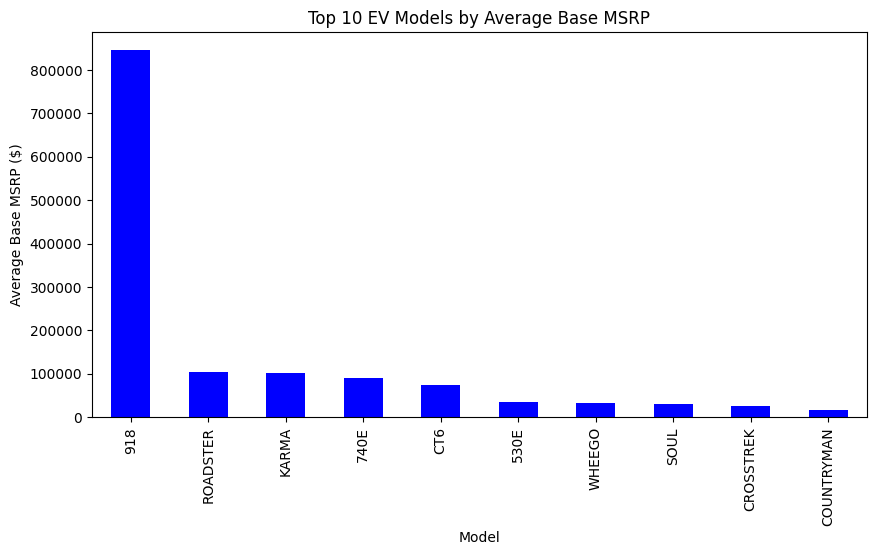

In [21]:
avg_price_model = df.groupby('Model')['Base MSRP'].mean().sort_values(ascending=False).head(10)
print("Top 10 EV Models by Average Base MSRP:")
print(avg_price_model)

# Bar plot
avg_price_model.plot(kind='bar', color='blue', figsize=(10,5))
plt.title("Top 10 EV Models by Average Base MSRP")
plt.ylabel("Average Base MSRP ($)")
plt.show()


### Q8: Regional Trends in EV Adoption
- Analyze if EVs are more popular in urban vs rural counties.
- Insight into geographic adoption patterns.


In [24]:
# Assuming urban/rural info is in a column 'Region Type' (Urban/Rural)
if 'Region Type' in df.columns:
    region_counts = df['Region Type'].value_counts()
    print("EV Distribution by Region Type:")
    print(region_counts)
    
    # Pie chart
    region_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue','lightgreen'], figsize=(6,6))
    plt.title("EV Adoption by Region Type")
    plt.ylabel("")
    plt.show()
else:
    print("Region Type column not found.")


Region Type column not found.


### Q1: Top 5 EV Makes and Models
- Visualize which EV makes and models are most popular in the dataset.
- Helps understand market preference at a glance.


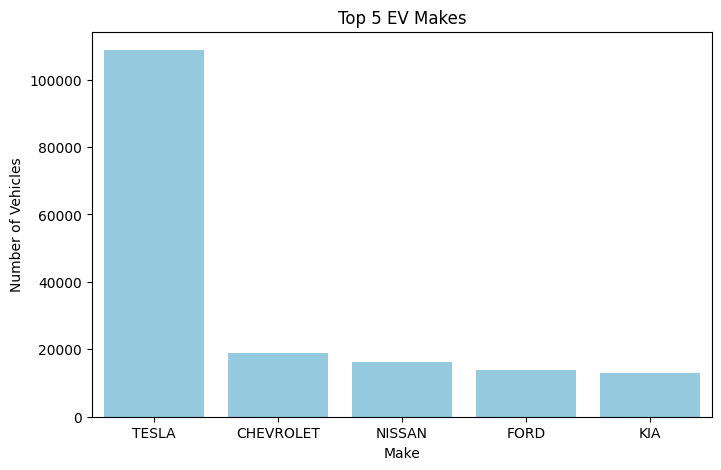

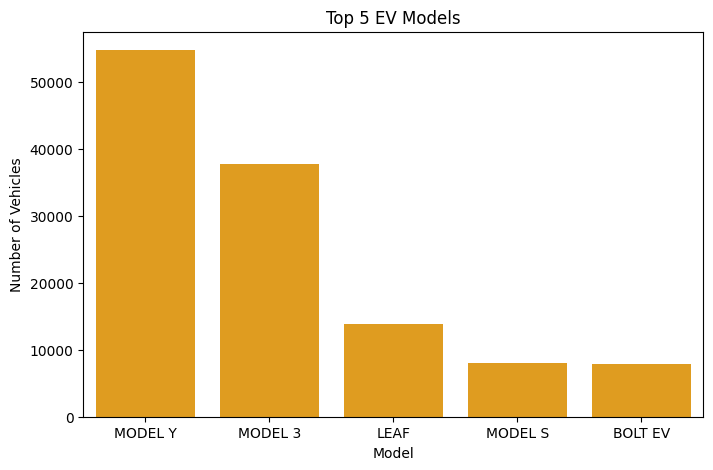

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Top 5 Makes
top_makes = df['Make'].value_counts().head(5).reset_index()
top_makes.columns = ['Make', 'Count']

plt.figure(figsize=(8,5))
sns.barplot(data=top_makes, x='Make', y='Count', color='skyblue')  # Using color instead of palette
plt.title("Top 5 EV Makes")
plt.xlabel("Make")
plt.ylabel("Number of Vehicles")
plt.show()

# Top 5 Models
top_models = df['Model'].value_counts().head(5).reset_index()
top_models.columns = ['Model', 'Count']

plt.figure(figsize=(8,5))
sns.barplot(data=top_models, x='Model', y='Count', color='orange')  # Using color instead of palette
plt.title("Top 5 EV Models")
plt.xlabel("Model")
plt.ylabel("Number of Vehicles")
plt.show()



### Q2: EV Distribution by County
- Visualizes how EVs are distributed across different counties.
- Helps identify regional trends in EV adoption.


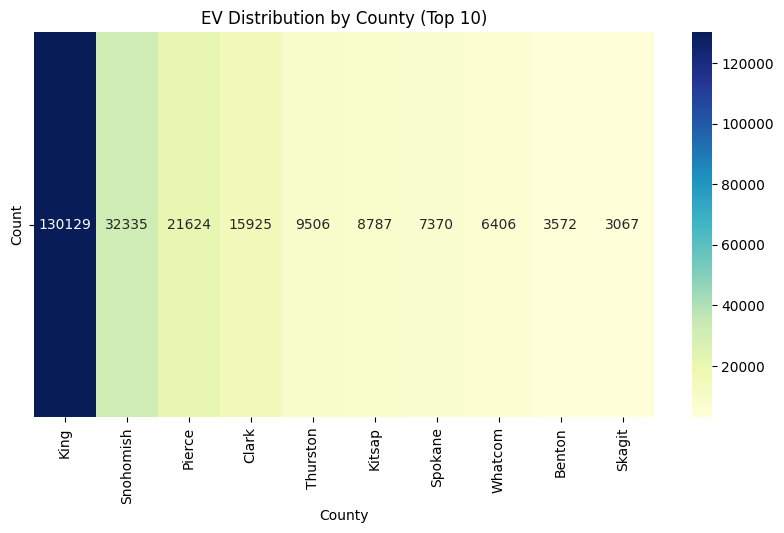

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 counties by EV count
ev_by_county = df['County'].value_counts().head(10).reset_index()
ev_by_county.columns = ['County', 'Count']

plt.figure(figsize=(10,5))
sns.heatmap(ev_by_county.set_index('County').T, annot=True, fmt='d', cmap='YlGnBu')
plt.title("EV Distribution by County (Top 10)")
plt.xlabel("County")
plt.ylabel("")
plt.show()


### Q3: EV Adoption Trend by Model Year
- Shows growth of EV registrations over different model years.
- Highlights adoption trends over time.


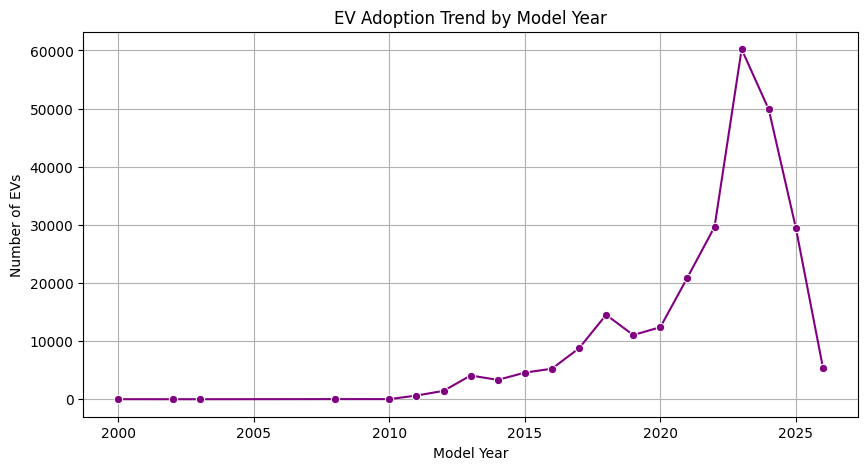

In [33]:
# Count of EVs by Model Year
ev_by_year = df['Model Year'].value_counts().sort_index().reset_index()
ev_by_year.columns = ['Model Year', 'Count']

plt.figure(figsize=(10,5))
sns.lineplot(data=ev_by_year, x='Model Year', y='Count', marker='o', color='purple')
plt.title("EV Adoption Trend by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Number of EVs")
plt.grid(True)
plt.show()


### Q4: Electric Range vs Base MSRP
- Scatter plot to analyze relationship between vehicle range and price.
- Helps identify pricing trends and outliers in EV market.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset with full path
file_path = r"C:\Users\Dell-PC\Downloads\Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(file_path)

# Quick check
print(df.head())
print(df.columns.tolist())  # Verify column names



   VIN (1-10)    County          City State  Postal Code  Model Year    Make  \
0  JTDKN3DP2D    Yakima        Yakima    WA      98902.0        2013  TOYOTA   
1  1FMCU0E1XS    Kitsap  Port Orchard    WA      98366.0        2025    FORD   
2  JM3KKBHA9R    Kitsap      Kingston    WA      98346.0        2024   MAZDA   
3  7SAYGDEE8P  Thurston       Olympia    WA      98501.0        2023   TESLA   
4  5YJ3E1EB5K  Thurston       Rainier    WA      98576.0        2019   TESLA   

     Model                   Electric Vehicle Type  \
0    PRIUS  Plug-in Hybrid Electric Vehicle (PHEV)   
1   ESCAPE  Plug-in Hybrid Electric Vehicle (PHEV)   
2    CX-90  Plug-in Hybrid Electric Vehicle (PHEV)   
3  MODEL Y          Battery Electric Vehicle (BEV)   
4  MODEL 3          Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0              Not eligible due to low battery range             6.0   
1            Clean Alternative Fuel Vehicle Eligib

In [5]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces


In [6]:
# Remove $ and commas if present, then convert to numeric
df['Base MSRP'] = df['Base MSRP'].astype(str).str.replace(r'[\$,]', '', regex=True)
df['Base MSRP'] = pd.to_numeric(df['Base MSRP'], errors='coerce')

df['Electric Range'] = df['Electric Range'].astype(str).str.replace(',', '', regex=True)
df['Electric Range'] = pd.to_numeric(df['Electric Range'], errors='coerce')


In [7]:
scatter_df = df.dropna(subset=['Base MSRP', 'Electric Range'])
print(f"Rows available for plotting: {len(scatter_df)}")  # Should be >0


Rows available for plotting: 261695


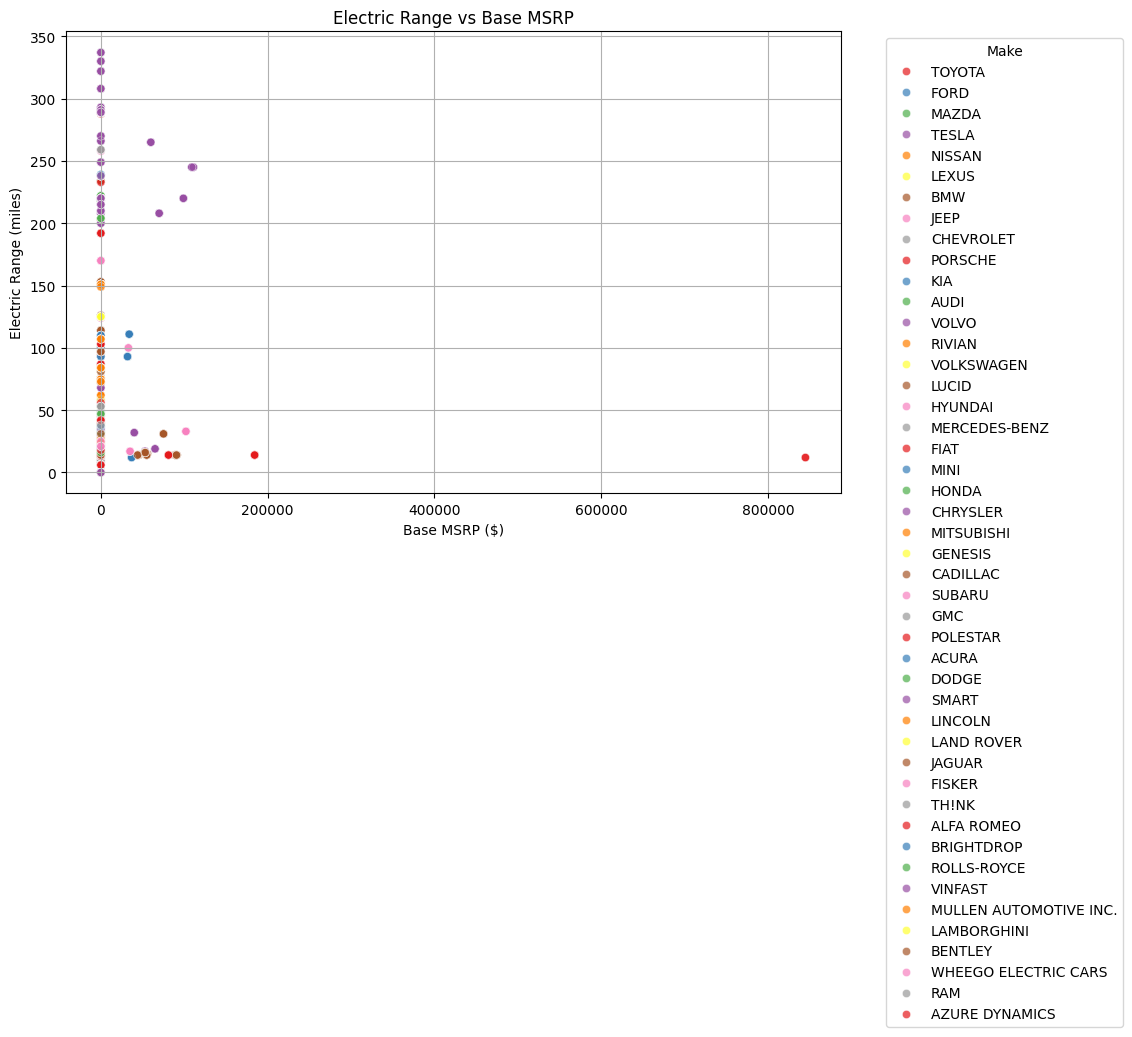

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=scatter_df, x='Base MSRP', y='Electric Range', hue='Make', palette='Set1', alpha=0.7)
plt.title("Electric Range vs Base MSRP")
plt.xlabel("Base MSRP ($)")
plt.ylabel("Electric Range (miles)")
plt.legend(title='Make', bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(True)
plt.show()


### Q5: CAFV Eligibility Distribution
- Shows proportion of EVs eligible vs non-eligible for CAFV incentives.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset again
df = pd.read_csv(r"C:\Users\Dell-PC\Downloads\Electric_Vehicle_Population_Data.csv")


# Clean column names (optional but safe)
df.columns = df.columns.str.strip()


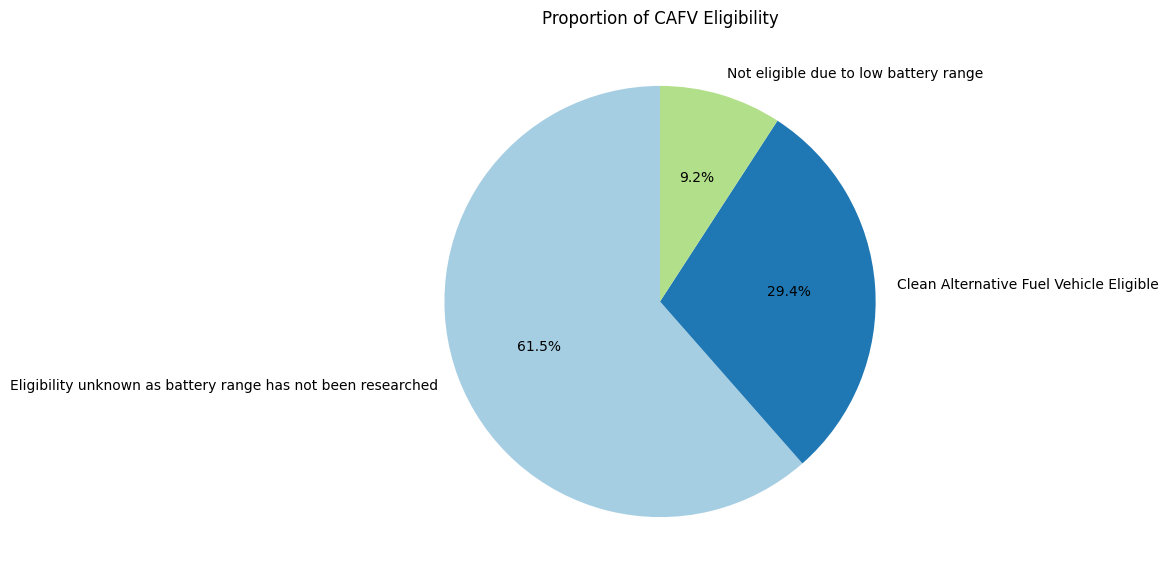

Counts:
 Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    160888
Clean Alternative Fuel Vehicle Eligible                          76819
Not eligible due to low battery range                            23991
Name: count, dtype: int64


In [11]:
caf_column = "Clean Alternative Fuel Vehicle (CAFV) Eligibility"

if caf_column in df.columns:
    cafv_counts = df[caf_column].value_counts()

    plt.figure(figsize=(7,7))
    plt.pie(
        cafv_counts.values,
        labels=cafv_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors
    )
    plt.title("Proportion of CAFV Eligibility")
    plt.show()

    print("Counts:\n", cafv_counts)
else:
    print("Column not found. Available columns are:", df.columns.tolist())


### Q6: Geospatial EV Registrations
- Maps EVs using GPS coordinates (latitude & longitude).
- Helps visualize geographic distribution of registrations.


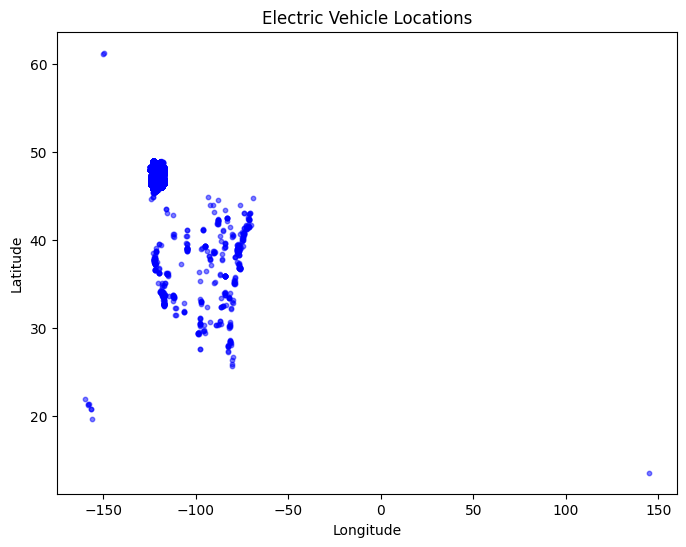

In [13]:
import matplotlib.pyplot as plt

# Extract lat/lon again
df[['Longitude','Latitude']] = df['Vehicle Location'].str.extract(r'POINT\s*\(([-\d\.]+)\s+([-\d\.]+)\)')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

geo_df = df.dropna(subset=['Latitude','Longitude'])

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(geo_df['Longitude'], geo_df['Latitude'], s=10, alpha=0.5, c='blue')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Electric Vehicle Locations")
plt.show()



# 4: Linear Regression on Electric Vehicle Dataset

### 4.1: Predicting Electric Range
Linear Regression models the relationship between a dependent variable (Electric Range) and independent variables (features) such as Model Year, Base MSRP, and Make. This allows us to predict the electric range for new vehicles based on specifications.

### 4.2: Features to Predict Electric Range
Potential independent variables:
- Model Year (numeric)
- Base MSRP (numeric)
- Make (categorical)
- Model (categorical)
Optional: Other numeric columns like Battery Capacity if available.

### 4.3: Handling Categorical Variables
Categorical variables like Make or Model are converted to numeric using One-Hot Encoding. This creates binary columns for each category, allowing regression to use them without assuming any ordinal relationship.


In [21]:
!pip install scikit-learn


In [23]:
import sklearn
print("scikit-learn installed successfully! Version:", sklearn.__version__)


scikit-learn installed successfully! Version: 1.7.2


In [22]:
# Step 0: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Step 1: Load dataset
df = pd.read_csv(r"C:\Users\Dell-PC\Downloads\Electric_Vehicle_Population_Data.csv")
df.columns = df.columns.str.strip()

# Step 2: Clean numeric columns
df['Base MSRP'] = df['Base MSRP'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df['Base MSRP'] = pd.to_numeric(df['Base MSRP'], errors='coerce')
df['Electric Range'] = pd.to_numeric(df['Electric Range'], errors='coerce')
df['Model Year'] = pd.to_numeric(df['Model Year'], errors='coerce')

# Step 3: Drop rows with missing values
df_reg = df.dropna(subset=['Base MSRP', 'Electric Range', 'Model Year', 'Make'])

# Step 4: Prepare features and target
X = df_reg[['Base MSRP', 'Model Year', 'Make']]
y = df_reg['Electric Range']

# One-Hot Encoding for 'Make'
X = pd.get_dummies(X, columns=['Make'], drop_first=True)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Fit Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Predictions & R² Score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

# Step 8: Coefficients
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)
print(coeff_df)


R² Score: 0.3455663905895503
                        Feature   Coefficient
19                  Make_JAGUAR  1.226131e+02
23              Make_LAND ROVER  4.054785e+01
22             Make_LAMBORGHINI  3.381195e+01
2               Make_ALFA ROMEO  3.300000e+01
27                   Make_MAZDA  3.136974e+01
11                   Make_DODGE  2.981725e+01
40                   Make_TESLA  2.526242e+01
24                   Make_LEXUS  2.300671e+01
5                  Make_BENTLEY  2.165422e+01
9                Make_CHEVROLET  1.883420e+01
33                Make_POLESTAR  1.761064e+01
34                 Make_PORSCHE  1.500439e+01
20                    Make_JEEP  1.179382e+01
21                     Make_KIA  1.121185e+01
16                     Make_GMC  7.656682e+00
3                     Make_AUDI  6.414768e+00
37             Make_ROLLS-ROYCE  2.558874e+00
18                 Make_HYUNDAI  1.784197e+00
25                 Make_LINCOLN  1.767215e+00
28           Make_MERCEDES-BENZ  1.214933e+00
8    

### 4.4: R² Score Interpretation
- R² measures how well the model explains the variance of Electric Range.
- Example: R² = 0.65 → 65% of the variance in Electric Range is explained by the features.

### 4.5: Influence of Base MSRP
- The coefficient of Base MSRP shows how much Electric Range changes per unit increase in price.
- Positive coefficient → Higher price implies longer range.
- Negative coefficient → Higher price reduces predicted range.

### 4.6: Improving Accuracy
1. Add more relevant features (Battery Capacity, weight, motor type).  
2. Remove outliers and handle missing values carefully.  
3. Try regularization methods like Ridge or Lasso.  
4. Use cross-validation to prevent overfitting.  

### 4.7: Predicting New EV Models
The trained model can predict the electric range for new vehicles by inputting their specifications in the same format (Base MSRP, Model Year, Make, etc.).
